This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2024-04-05 14:59:22.321024: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


60000 images, 28 x 28 pixels

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

entropy for classification

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

gray scale: 0 = white, 255 = black

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

Batch size is the number of samples that you feed to your neural network at each iteration of the training process.\
It determines how often you update the weights of your network based on the gradient of the loss function.

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2695 - accuracy: 0.9221
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1075 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0716 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0519 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9883


**Using the model to make predictions**

each value in the array represents the probability of the test image being that number

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 70ms/step


array([8.4151415e-09, 1.1198732e-09, 1.1052068e-06, 4.7785497e-06,
       7.1779475e-12, 3.8442227e-10, 1.3105383e-13, 9.9999219e-01,
       5.2561788e-08, 1.8705397e-06], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999922

In [15]:
test_labels[0]

7

**Evaluating the model on new data**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9796
test_acc: 0.9796000123023987


## Data representations for neural networks

tensors are a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, a dimension is often called an axis)

### Scalars (rank-0 tensors)

A tensor that contains only one number is called a scalar (or scalar tensor, or rank-0 tensor, or 0D tensor).

In NumPy, a float32 or float64 number is a scalar tensor (or scalar array).

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

The number of axes of a tensor is also called its rank

In [18]:
x.ndim

0

### Vectors (rank-1 tensors)

This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D vector with a 5D tensor! 

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

### Matrices (rank-2 tensors)

The entries from the first axis are called the rows, and the entries from the second axis are called the columns.

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

* Number of axes (rank)
* Shape
* Data type

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [27]:
train_images.shape
# 60,000 matrices of 28 × 28 integers.

(60000, 28, 28)

In [28]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

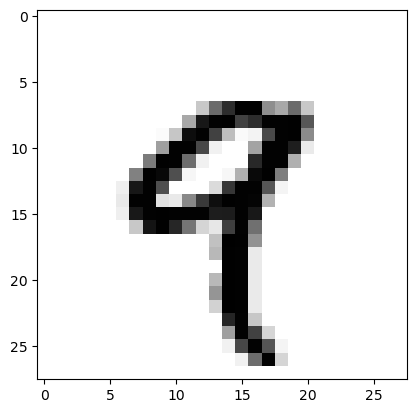

In [29]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [30]:
train_labels[4]

9

### Manipulating tensors in NumPy

electing specific elements in a tensor is called tensor slicing

In [31]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[:, 14:, 14:]

In [36]:
# crop the images to patches of 14 × 14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [37]:
batch = train_images[:128]

In [38]:
batch = train_images[128:256]

In [39]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

the first axis (axis 0) is called the batch axis or batch dimension

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data
(samples, height, width, color_depth)

### Video data
(samples, frames, height, width, color_depth)

## The gears of neural networks: tensor operations

### Element-wise operations
perations that are applied independently to each entry in the tensors being considered.

In [40]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy() # Avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [41]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [42]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [43]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.64 s


### Broadcasting
1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.

2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [44]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [45]:
# add an empty first axis to y
y = np.expand_dims(y, axis=0)

In [46]:
# repeat y 32 times alongside this new axis
Y = np.concatenate([y] * 32, axis=0)

In [47]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [48]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [49]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y) # dot product

In [50]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [51]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [52]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [53]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping
Reshaping a tensor means rearranging its rows and columns to match a target shape.

In [54]:
train_images = train_images.reshape((60000, 28 * 28))

In [55]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [56]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [57]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning
* translation
* rotation
* scaling
* linear transform
* affine transform
* relu

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow
The API through which you can leverage TensorFlow’s powerful automatic differentiation capabilities

In [58]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    # Inside the scope, apply some tensor operations to our variable.
    y = 2 * x + 3
#Use the tape to retrieve the gradient of the output y with respect to our variable x.
grad_of_y_wrt_x = tape.gradient(y, x)

In [61]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [59]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [62]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [64]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    # matmul is how you say “dot product” in TensorFlow.
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [63]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.3244823, 1.3244823],
        [0.6862694, 0.6862694]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [75]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [76]:
train_images.shape

(60000, 784)

In [77]:
test_images.shape

(10000, 784)

In [78]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [79]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [80]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2630 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9883


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [81]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        # Create a matrix, W, of shape (input_size, output_size), initialized with random values.
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        # Create a vector, b, of shape (output_size,), initialized with zeros.
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        # Apply the forward pass
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    # Convenience method for retrieving the layer’s weights
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [82]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    # calls the underlying layers on the inputs
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    # easily keep track of the layers’ parameters
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [83]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [84]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step
1. Compute the predictions of the model for the images in the batch.

2. Compute the loss value for these predictions, given the actual labels.

3. Compute the gradient of the loss with regard to the model’s weights.

4. Move the weights by a small amount in the direction opposite to the gradient.

In [85]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [86]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        # assign_sub is the equivalent of -= for TensorFlow variables.
        w.assign_sub(g * learning_rate)

In [87]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [88]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [89]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.32
loss at batch 100: 2.29
loss at batch 200: 2.23
loss at batch 300: 2.10
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.91
loss at batch 100: 1.91
loss at batch 200: 1.84
loss at batch 300: 1.72
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.60
loss at batch 200: 1.52
loss at batch 300: 1.42
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.32
loss at batch 100: 1.36
loss at batch 200: 1.25
loss at batch 300: 1.21
loss at batch 400: 1.27
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.17
loss at batch 200: 1.05
loss at batch 300: 1.04
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.03
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 0.99
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.92
loss at batch 200: 0.81
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.84
loss at batch 200: 0.73
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [91]:
predictions = model(test_images)
predictions = predictions.numpy() # Calling .numpy() on a TensorFlow tensor converts it to a NumPy tensor
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.82


## Summary
* Tensors form the foundation of modern machine learning systems. They come in various flavors of dtype, rank, and shape.
* You can manipulate numerical tensors via tensor operations (such as addition, tensor product, or element-wise multiplication), which can be interpreted as encoding geometric transformations. In general, everything in deep learning is amenable to a geometric interpretation.
* Deep learning models consist of chains of simple tensor operations, parameterized by weights, which are themselves tensors. The weights of a model are where its “knowledge” is stored.
* Learning means finding a set of values for the model’s weights that minimizes a loss function for a given set of training data samples and their corresponding targets.
* Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the model parameters with respect to the loss on the batch. The model parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient. This is called mini-batch stochastic gradient descent.
* The entire learning process is made possible by the fact that all tensor operations in neural networks are differentiable, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value. This is called backpropagation.
* Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a model.
  * The loss is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.
  * The optimizer specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.


